<h1>Forecasting number of Air Passengers for next 10 years</h1>

- Importing all the required libraries for analysis

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

%matplotlib inline
from matplotlib.pylab import rcParams
from datetime import datetime
import warnings

warnings.filterwarnings("ignore")

- Reading the dataset file and checking the size of file

In [26]:
data = pd.read_csv(r"AirPassengers.csv")
data.shape

(144, 2)

- Creating the 'Date' as Index for data and viewing the dataset

In [27]:
data["Month"] = pd.to_datetime(data["Month"], infer_datetime_format=True)
data = data.set_index(["Month"])
print(data.head())
print(data.tail())

            Passengers
Month                 
1949-01-01         112
1949-02-01         118
1949-03-01         132
1949-04-01         129
1949-05-01         121
            Passengers
Month                 
1960-08-01         606
1960-09-01         508
1960-10-01         461
1960-11-01         390
1960-12-01         432


- Visualizing the Time Series plot for the number of Air Passengers 

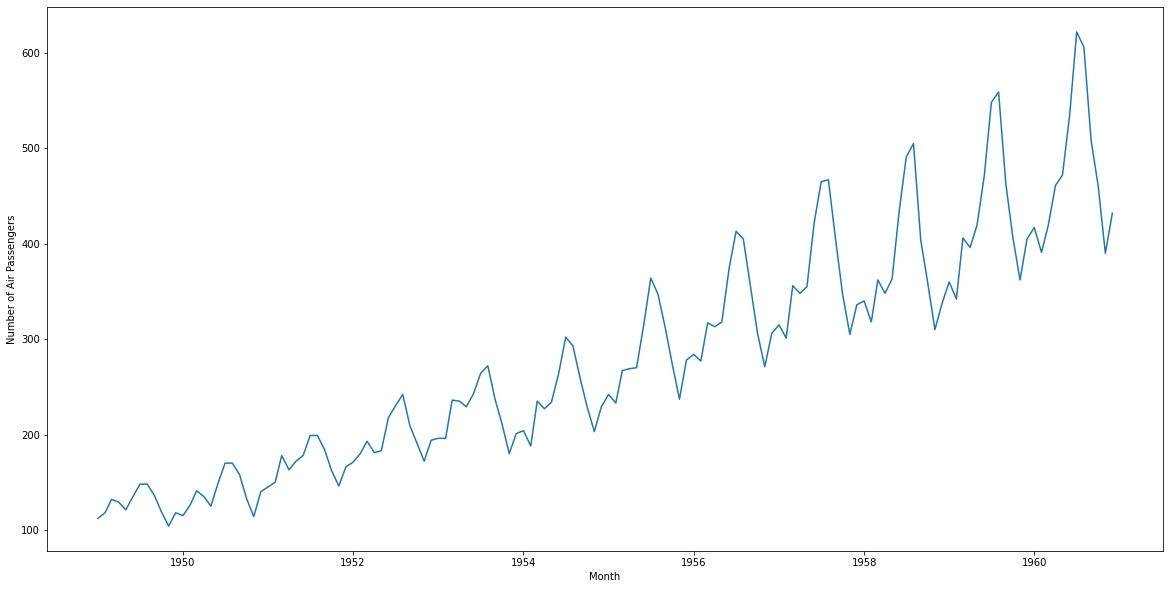

In [28]:
plt.figure(figsize=(20, 10))
plt.xlabel("Month")
plt.ylabel("Number of Air Passengers")
plt.plot(data)

- As we know that, A stationary Time Series is one which characteristics like mean and variance does not change over time
- Preparing the data for analyzing the Rolling Mean and Standard Deviation to check stationarity for given Time Series

In [29]:
rolmean = data.rolling(window=12).mean()
rolstd = data.rolling(window=12).std()
print(rolmean.head(15))
print(rolstd.head(15))

            Passengers
Month                 
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
1949-06-01         NaN
1949-07-01         NaN
1949-08-01         NaN
1949-09-01         NaN
1949-10-01         NaN
1949-11-01         NaN
1949-12-01  126.666667
1950-01-01  126.916667
1950-02-01  127.583333
1950-03-01  128.333333
            Passengers
Month                 
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
1949-06-01         NaN
1949-07-01         NaN
1949-08-01         NaN
1949-09-01         NaN
1949-10-01         NaN
1949-11-01         NaN
1949-12-01   13.720147
1950-01-01   13.453342
1950-02-01   13.166475
1950-03-01   13.686977


- Plotting the Rolling Mean and Standard Deviation, which has window of 12
- By looking below plot, we conclude that, it is non-stationary bcoz mean and variance is not constant

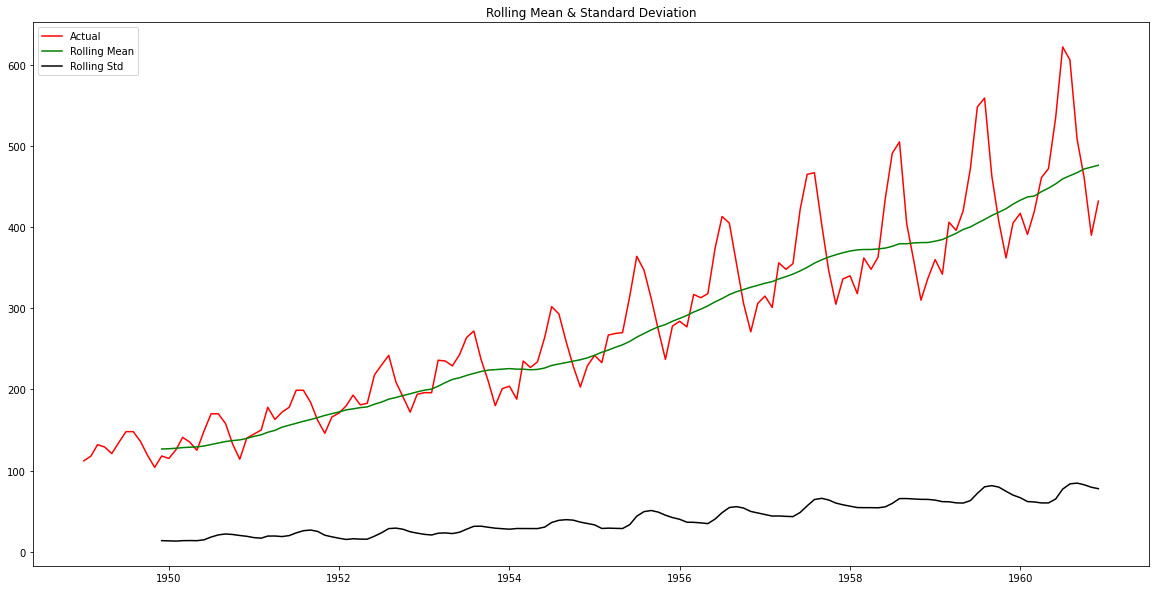

In [30]:
plt.figure(figsize=(20, 10))
actual = plt.plot(data, color="red", label="Actual")
mean_6 = plt.plot(rolmean, color="green", label="Rolling Mean")
std_6 = plt.plot(rolstd, color="black", label="Rolling Std")
plt.legend(loc="best")
plt.title("Rolling Mean & Standard Deviation")
plt.show(block=False)

- Using ADF (Augmented Dickey-Fuller Test) to check stationarity, another approach based on statistics.
- ADF has : 
<b>Null hypothesis         - Time Series is non-stationary</b>

In [31]:
from statsmodels.tsa.stattools import adfuller

print("Dickey-Fuller Test: ")
dftest = adfuller(data["Passengers"], autolag="AIC")
dfoutput = pd.Series(
    dftest[0:4], index=["Test Statistic", "p-value", "Lags Used", "No. of Obs"]
)
for key, value in dftest[4].items():
    dfoutput["Critical Value (%s)" % key] = value
print(dfoutput)

Dickey-Fuller Test: 
Test Statistic            0.815369
p-value                   0.991880
Lags Used                13.000000
No. of Obs              130.000000
Critical Value (1%)      -3.481682
Critical Value (5%)      -2.884042
Critical Value (10%)     -2.578770
dtype: float64


- From above ADF test, we fail to reject the null hypothesis, since p-value is greater than 0.05

- Below we took log transformation to make our Time series stationary and plotted visual for it
- We found graph upward trending over time with seasonality 

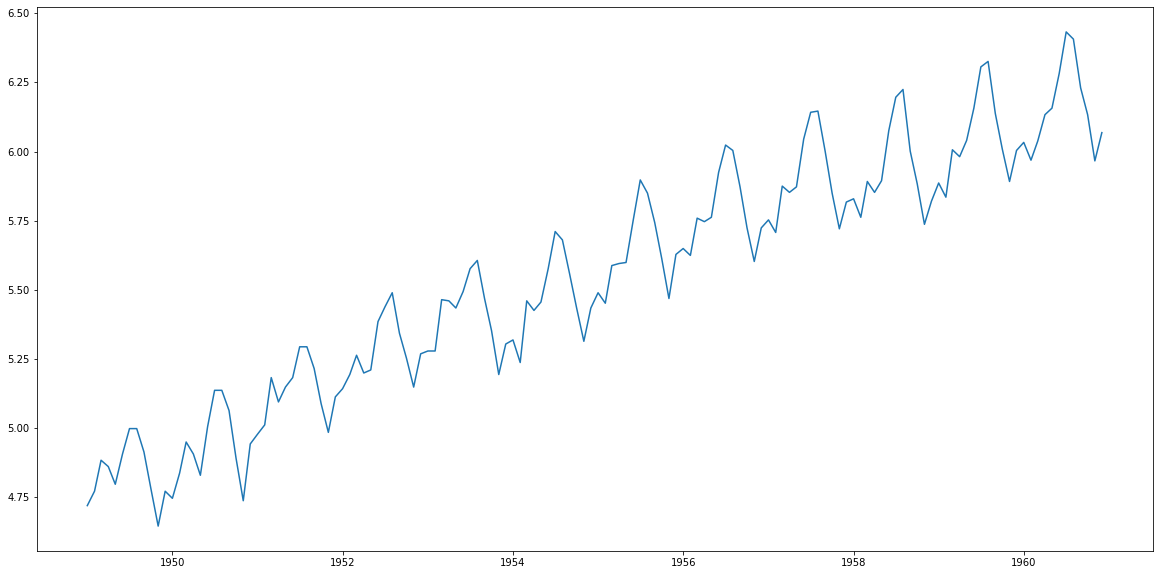

In [32]:
plt.figure(figsize=(20, 10))
data_log = np.log(data)
plt.plot(data_log)

- Testing Rolling Mean with window 12 on above log transformation and concluded non-stationary, again

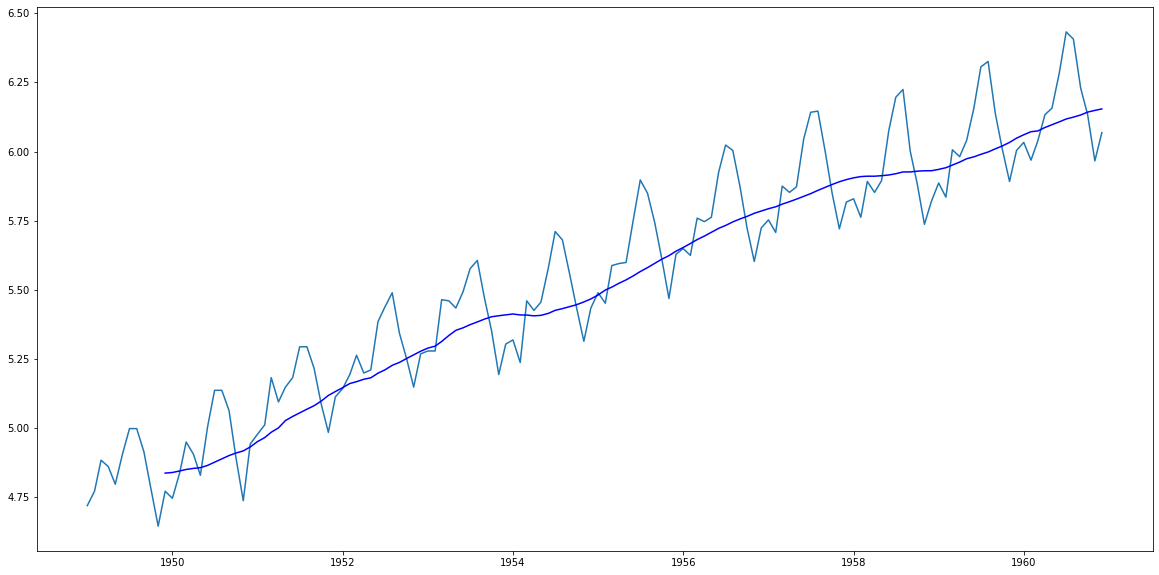

In [33]:
plt.figure(figsize=(20, 10))
MAvg = data_log.rolling(window=12).mean()
MStd = data_log.rolling(window=12).std()
plt.plot(data_log)
plt.plot(MAvg, color="blue")

- Using another method differencing, to make our time series stationary

In [34]:
data_log_diff = data_log - MAvg
data_log_diff.head(12)

,Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


- Output of differencing method, after dropping null values

In [35]:
data_log_diff = data_log_diff.dropna()
data_log_diff.head()

,Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142


- Defining function for Rolling Mean and Standard Deviation & ADF test

In [36]:
def stationarity(timeseries):
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()

    plt.figure(figsize=(20, 10))
    actual = plt.plot(timeseries, color="red", label="Actual")
    mean_6 = plt.plot(rolmean, color="green", label="Rolling Mean")
    std_6 = plt.plot(rolstd, color="black", label="Rolling Std")
    plt.legend(loc="best")
    plt.title("Rolling Mean & Standard Deviation")
    plt.show(block=False)

    print("Dickey-Fuller Test: ")
    dftest = adfuller(timeseries["Passengers"], autolag="AIC")
    dfoutput = pd.Series(
        dftest[0:4], index=["Test Statistic", "p-value", "Lags Used", "No. of Obs"]
    )
    for key, value in dftest[4].items():
        dfoutput["Critical Value (%s)" % key] = value
    print(dfoutput)

- Checking the stationarity of differenced data
- From Rolling method, we see that Mean and standard deviation is not varying.
- From ADF, we reject the null hypothesis bcoz p-value is less than 0.05 (significance level)
- Applying all the transformation and methods, our differenced data is now stationary

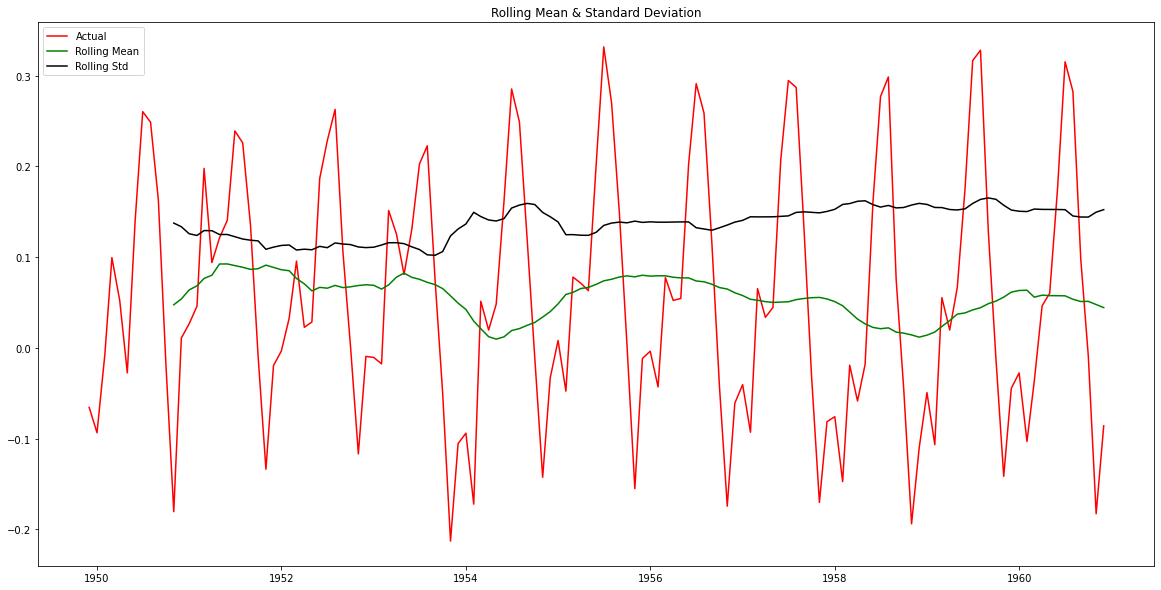

Dickey-Fuller Test: 
Test Statistic           -3.162908
p-value                   0.022235
Lags Used                13.000000
No. of Obs              119.000000
Critical Value (1%)      -3.486535
Critical Value (5%)      -2.886151
Critical Value (10%)     -2.579896
dtype: float64


In [37]:
stationarity(data_log_diff)

- Checking for Trend stationarity and performing exponential transformation on our data

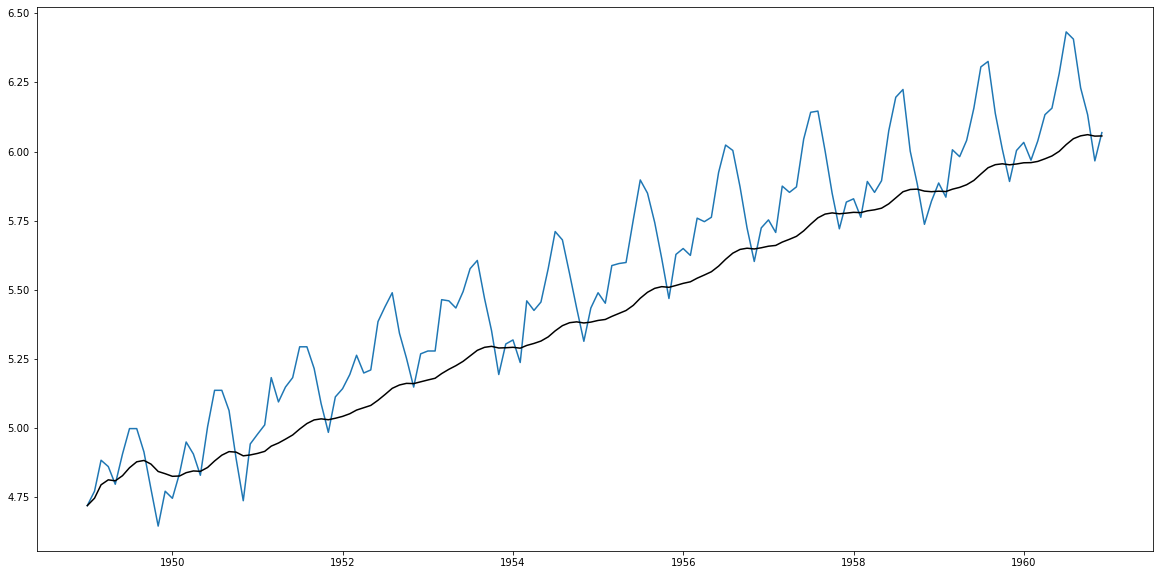

In [38]:
plt.figure(figsize=(20, 10))
exp_data = data_log.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(data_log)
plt.plot(exp_data, color="black")

- Since log transformation is non-stationary, applying differencing on our data.

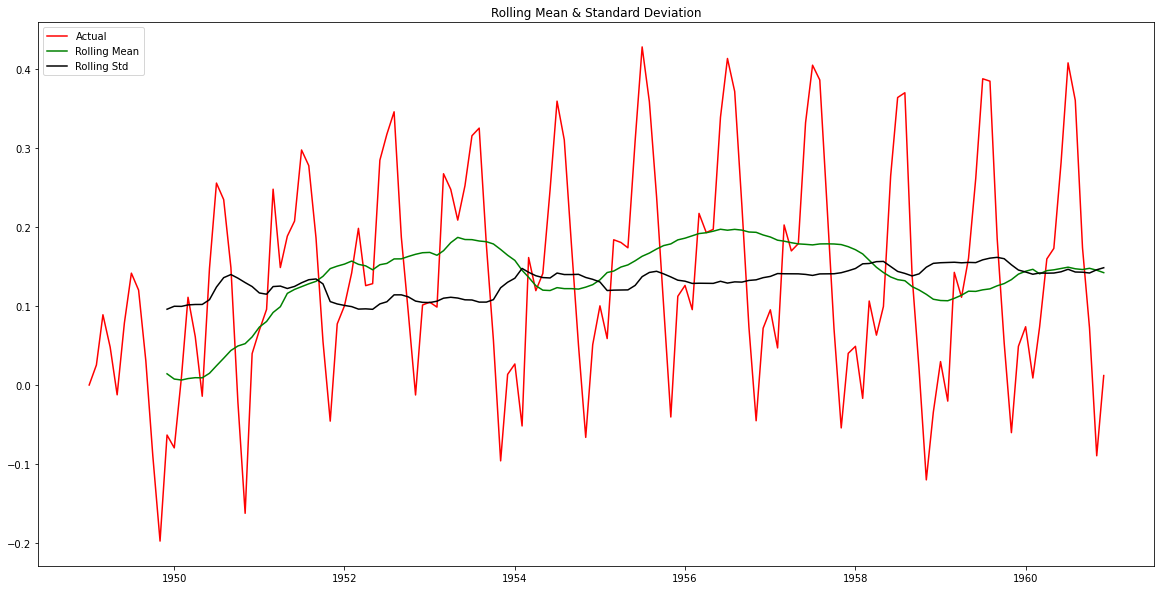

Dickey-Fuller Test: 
Test Statistic           -3.601262
p-value                   0.005737
Lags Used                13.000000
No. of Obs              130.000000
Critical Value (1%)      -3.481682
Critical Value (5%)      -2.884042
Critical Value (10%)     -2.578770
dtype: float64


In [39]:
exp_data_diff = data_log - exp_data
stationarity(exp_data_diff)

- From above graph and ADF test, we conclude, it is trend stationary

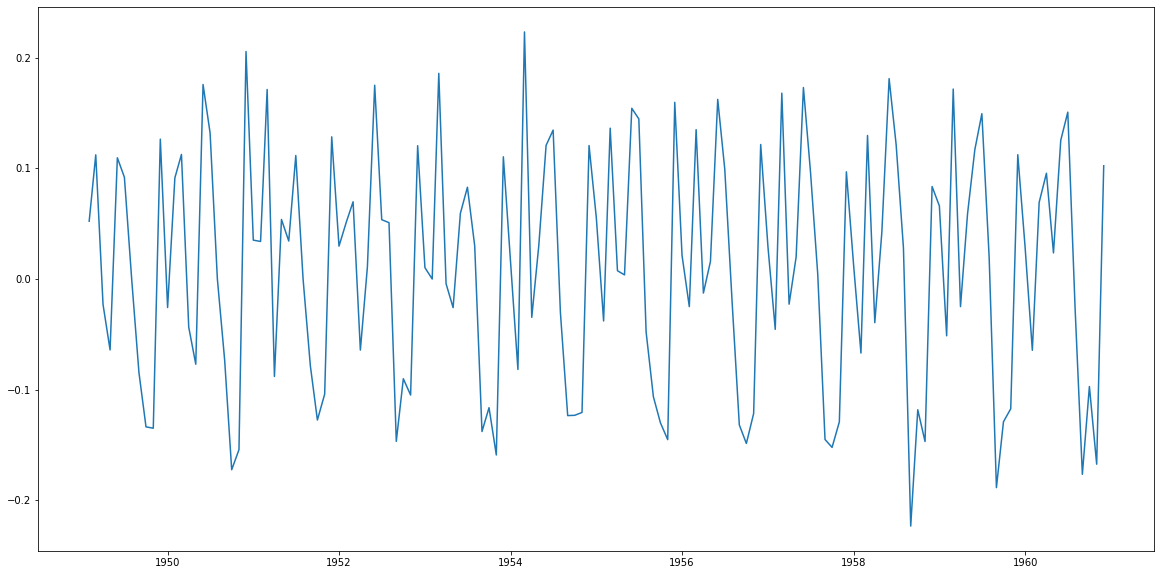

In [40]:
plt.figure(figsize=(20, 10))
data_shift = data_log - data_log.shift()
plt.plot(data_shift)

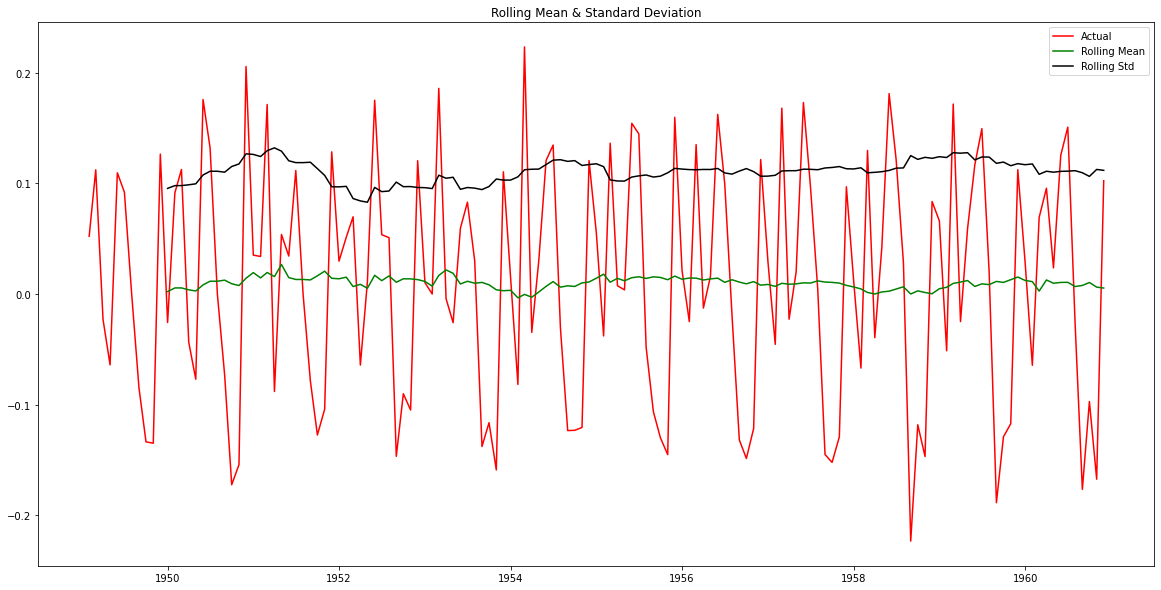

Dickey-Fuller Test: 
Test Statistic           -2.717131
p-value                   0.071121
Lags Used                14.000000
No. of Obs              128.000000
Critical Value (1%)      -3.482501
Critical Value (5%)      -2.884398
Critical Value (10%)     -2.578960
dtype: float64


In [41]:
data_shift = data_shift.dropna()
stationarity(data_shift)

- Decomposing Time Series into its components : Trend, Seasonality and Residual

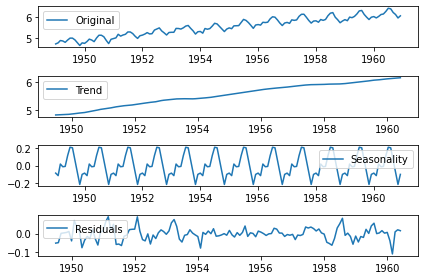

In [42]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomp = seasonal_decompose(data_log)

trend = decomp.trend
seasonal = decomp.seasonal
residual = decomp.resid

plt.subplot(411)
plt.plot(data_log, label="Original")
plt.legend(loc="best")
plt.subplot(412)
plt.plot(trend, label="Trend")
plt.legend(loc="best")
plt.subplot(413)
plt.plot(seasonal, label="Seasonality")
plt.legend(loc="best")
plt.subplot(414)
plt.plot(residual, label="Residuals")
plt.legend(loc="best")
plt.tight_layout()

- Checking the stationarity of Time Series components

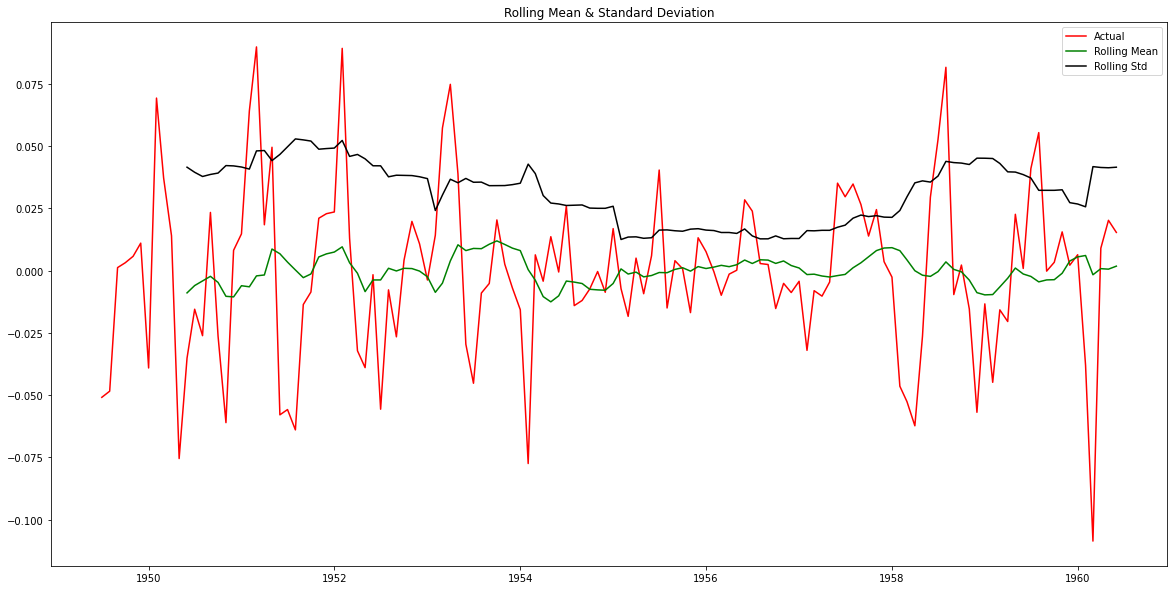

Dickey-Fuller Test: 


KeyError: 'Passengers'

In [43]:
decomp_data = residual
decomp_data = decomp_data.dropna()
stationarity(decomp_data)

- Plotting the ACF and PACF to find q and p value
- We got q and p both 2 from the graph

Text(0.5, 1.0, 'Partial Autocorrelation Function')

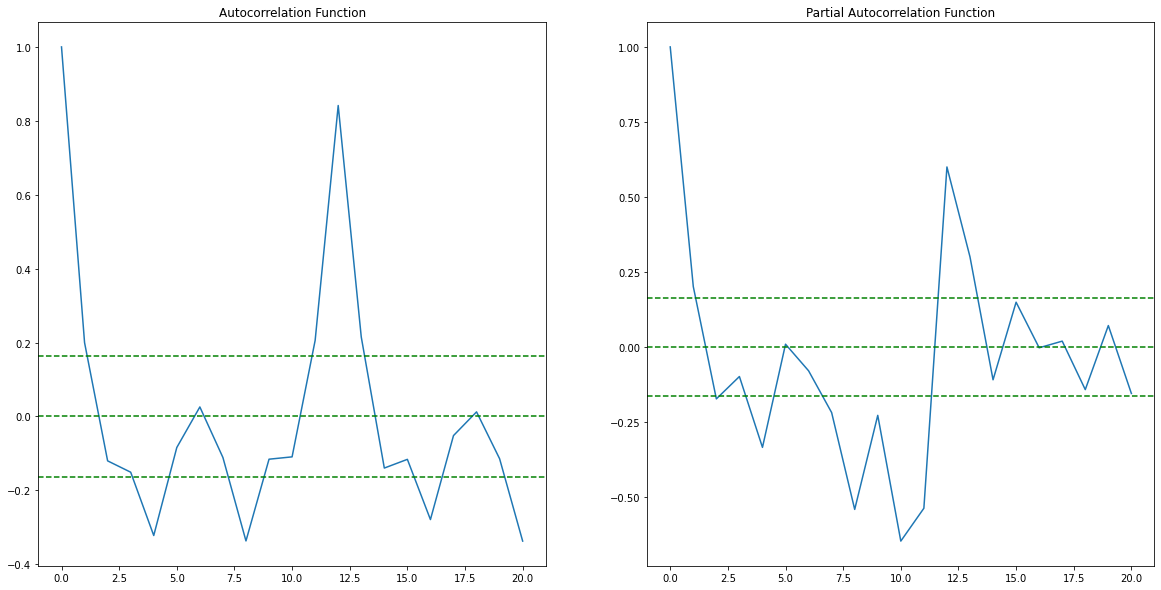

In [ ]:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(data_shift, nlags=20)
lag_pacf = pacf(data_shift, nlags=20, method="ols")

plt.figure(figsize=(20, 10))
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle="--", color="green")
plt.axhline(y=-1.96 / np.sqrt(len(data_shift)), linestyle="--", color="green")
plt.axhline(y=1.96 / np.sqrt(len(data_shift)), linestyle="--", color="green")
plt.title("Autocorrelation Function")

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle="--", color="green")
plt.axhline(y=-1.96 / np.sqrt(len(data_shift)), linestyle="--", color="green")
plt.axhline(y=1.96 / np.sqrt(len(data_shift)), linestyle="--", color="green")
plt.title("Partial Autocorrelation Function")

- Building the ARIMA model with p=2, q=2 and I=1

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

plt.figure(figsize=(20, 10))
model = ARIMA(data_log, order=(2, 1, 2))
results = model.fit(disp=-1)
plt.plot(data_shift)
plt.plot(results.fittedvalues, color="red")
plt.title("RSS: %.4f" % sum((results.fittedvalues - data_shift["Passengers"]) ** 2))
print("plotting ARIMA model")

NotImplementedError: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been removed in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and statsmodels.tsa.SARIMAX.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained. It also offers alternative specialized
parameter estimators.


<Figure size 1440x720 with 0 Axes>

- Predicted values from ARIMA model in difference form

In [ ]:
predictions = pd.Series(results.fittedvalues, copy=True)
print(predictions.head())

NameError: name 'results' is not defined

- Performing Inverse Transformation for differencing, by doing cumulative sum

In [ ]:
predictions_cum_sum = predictions.cumsum()
print(predictions_cum_sum.head())

Month
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
dtype: float64


- Below is data display of predicted value in log scale

In [ ]:
predictions_log = pd.Series(data_log["Passengers"].ix[0], index=data_log.index)
predictions_log = predictions_log.add(predictions_cum_sum, fill_value=0)
predictions_log.head()

Month
1949-01-01    4.718499
1949-02-01    4.728079
1949-03-01    4.745570
1949-04-01    4.773241
1949-05-01    4.768720
dtype: float64

Taking out log transformation and visualizing actual vs predicted value graph

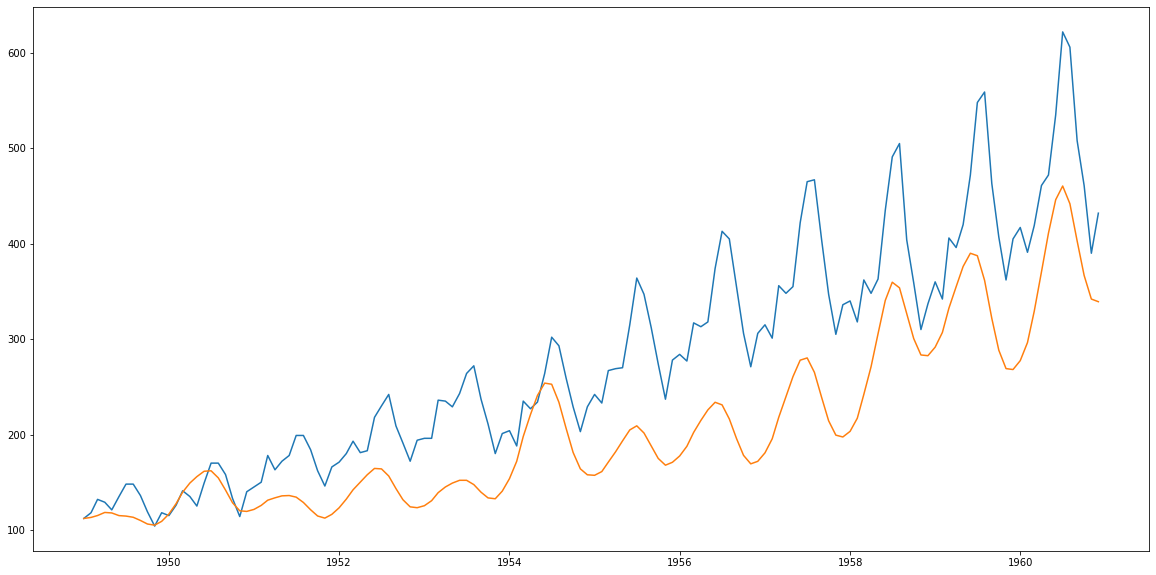

In [ ]:
predictions_ARIMA = np.exp(predictions_log)
plt.figure(figsize=(20, 10))
plt.plot(data)
plt.plot(predictions_ARIMA)

- Plotting the visual for forecast of next 10 years with 95% confidence interval

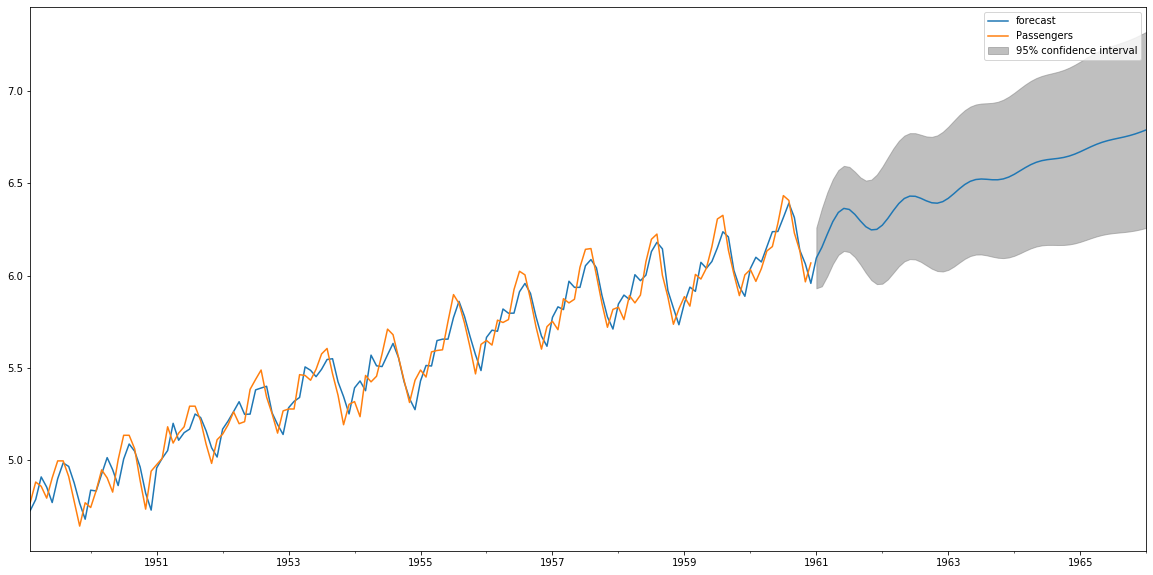

In [ ]:
rcParams["figure.figsize"] = 20, 10
results.plot_predict(1, 204)
x = results.forecast(steps=120)

- Next 10 years predicted value on log scale

In [ ]:
x[0]

array([6.09553391, 6.15281403, 6.2244297 , 6.29241111, 6.3416473 ,
       6.36359377, 6.35784699, 6.33139313, 6.29597544, 6.26447712,
       6.2473832 , 6.25025165, 6.27275832, 6.30940312, 6.35151498,
       6.38988664, 6.41727392, 6.43011064, 6.42906696, 6.4184249 ,
       6.40456151, 6.39403607, 6.39183072, 6.40019494, 6.41833686,
       6.44295406, 6.46937438, 6.49293991, 6.51024124, 6.51989037,
       6.52267578, 6.52112382, 6.51864518, 6.51853678, 6.5231191 ,
       6.5332235 , 6.54812862, 6.56591553, 6.58410307, 6.60036539,
       6.61313265, 6.62192778, 6.62737782, 6.63093119, 6.63438676,
       6.63937971, 6.64696491, 6.65739828, 6.67015315, 6.68414243,
       6.6980662 , 6.71077894, 6.72157725, 6.73033974, 6.73749799,
       6.74386365, 6.75037307, 6.75782576, 6.76668666, 6.77699808,
       6.78841306, 6.80032841, 6.81207183, 6.82308748, 6.83307123,
       6.84202478, 6.85022296, 6.85811203, 6.86617322, 6.87479132,
       6.88416284, 6.89426366, 6.90487872, 6.91567921, 6.92632

- Actual predicted value for next 10 years, after taking out log transformation

In [ ]:
np.exp(x[0])

array([ 443.87096773,  470.03822926,  504.93499677,  540.45485383,
        567.73076369,  580.32817788,  577.0027264 ,  561.93890502,
        542.38465062,  525.56670501,  516.65906149,  518.14319957,
        529.93709757,  549.71673437,  573.36068086,  595.78903821,
        612.33157204,  620.24256733,  619.59556831,  613.03675903,
        604.59662879,  598.26635901,  596.94842755,  601.96237161,
        612.98278921,  628.25997661,  645.08002343,  660.46220977,
        671.98850979,  678.50399443,  680.39654402,  679.34141465,
        677.65965379,  677.58620102,  680.69824647,  687.61115537,
        697.93684408,  710.46204658,  723.50182411,  735.36383477,
        744.81260498,  751.39221698,  755.49851775,  758.1878572 ,
        760.81236516,  764.62055907,  770.44241015,  778.52280546,
        788.51635291,  799.62464964,  810.83630904,  821.21006752,
        830.1257913 ,  837.43172982,  843.44777854,  848.83400241,
        854.37744903,  860.76864634,  868.42972087,  877.43079

<b>*************************End****************************</b>